In [1]:
import ctypes
import numpy as np
import cv2
import PIL.Image, PIL.ImageFilter
import structure_camera as sc
import importlib

In [8]:
importlib.reload(sc)

<module 'structure_camera' from 'D:\\tranduytrung\\py-occipital-structure\\structure_camera.py'>

In [2]:
cam = sc.StructureCamera()
cam.infrared_enabled = True
cam.visible_enabled = False
cam.depth_range = sc.StructureCamera.SC_DEPTH_RANGE_VERY_SHORT
cam.infrared_mode = sc.StructureCamera.SC_INFRARED_MODE_RIGHT
cam.infrared_auto_exposure = True

In [3]:
cam.start()

True

In [34]:
cam.stop()

In [92]:
vim = cam.last_visible_frame()
iim = cam.last_infrared_frame()

In [93]:
PIL.Image.fromarray(bytescaling(iim)).save('dst.png')

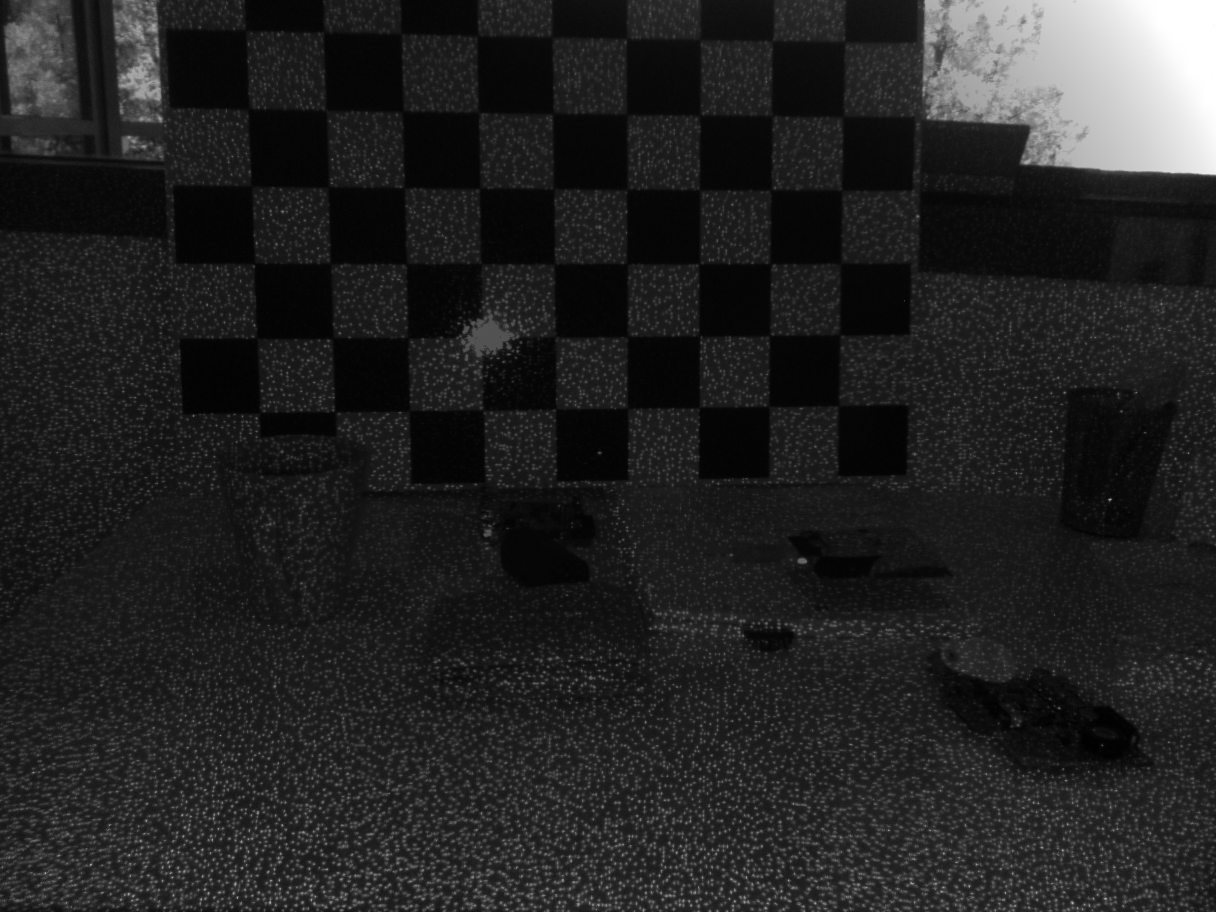

In [33]:
PIL.Image.fromarray(bytescaling(cam.last_infrared_frame()))

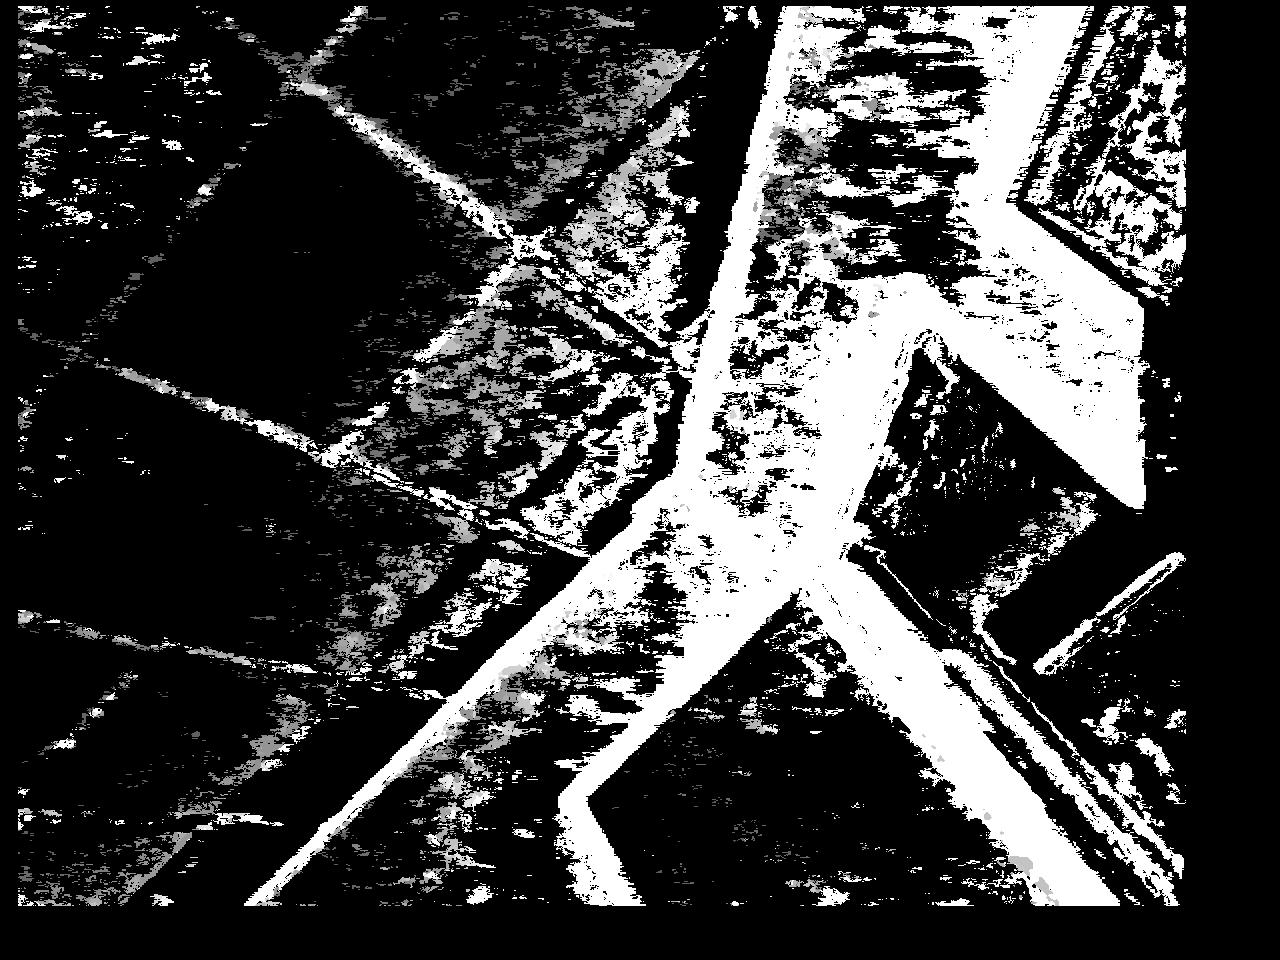

In [223]:
depth = cam.last_depth_frame()
depth = np.clip(depth/1000, 0.3, 1.0)*255
PIL.Image.fromarray(depth.astype(np.uint8))

In [7]:
def bytescaling(data, cmin=None, cmax=None, high=255, low=0):
    """
    Converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255). If the input image already has 
    dtype uint8, no scaling is done.
    :param data: 16-bit image data array
    :param cmin: bias scaling of small values (def: data.min())
    :param cmax: bias scaling of large values (def: data.max())
    :param high: scale max value to high. (def: 255)
    :param low: scale min value to low. (def: 0)
    :return: 8-bit image data array
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        high = 255
    if low < 0:
        low = 0
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)